# Heart disease detection system
Train system that predict that the patient have any heart disease by using old data

## loadind data

In [3]:
import pandas as pd
df=pd.read_csv('Model/datasets_4123_6408_framingham.csv')

In [4]:
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2160,0,62,1.0,0,0.0,0.0,0,1,0,242.0,130.0,91.0,31.12,80.0,NaN,0
467,1,53,1.0,1,50.0,0.0,0,0,0,306.0,127.0,82.5,31.22,72.0,NaN,0
1219,1,58,1.0,0,0.0,0.0,0,1,0,264.0,181.0,90.0,24.49,75.0,71.0,0
3124,0,51,3.0,0,0.0,0.0,0,1,0,198.0,142.5,80.0,23.86,76.0,100.0,0
2400,0,35,2.0,0,0.0,0.0,0,0,0,135.0,105.0,69.0,22.88,70.0,76.0,0


In [5]:
df.drop('education',axis=1, inplace=True)

In [6]:
df.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3507,1,50,1,16.0,0.0,0,0,0,214.0,114.0,72.0,22.93,66.0,83.0,0
1954,0,51,0,0.0,0.0,0,0,0,216.0,128.0,83.5,24.41,72.0,75.0,0
1484,1,61,0,0.0,0.0,0,0,0,179.0,112.0,66.5,24.38,60.0,100.0,0
3770,1,40,1,20.0,0.0,0,0,0,290.0,120.0,89.0,27.99,80.0,66.0,0
771,0,63,0,0.0,0.0,0,1,0,210.0,148.0,85.5,24.01,76.0,88.0,1


In [7]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
missing_columns=['cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']

In [9]:
for col in missing_columns:
    print(col)

cigsPerDay
BPMeds
totChol
BMI
glucose
heartRate


In [10]:
for col in missing_columns:
    mode_value=df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)

C:\Users\haseeeb\AppData\Local\Temp\ipykernel_17880\2256669433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value,inplace=True)


In [11]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Balanceing data 

In [12]:
from matplotlib import pyplot as plt

<Axes: xlabel='TenYearCHD'>

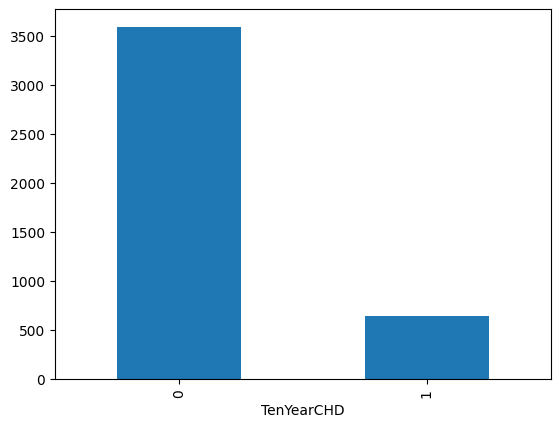

In [13]:
df['TenYearCHD'].value_counts().plot(kind='bar')

In [14]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [15]:
from sklearn.utils import resample
df_mojarity=df[df['TenYearCHD']==0]
df_minority=df[df['TenYearCHD']==1]

In [16]:
unsample_data=resample(df_minority,random_state=42,replace=True, n_samples=len(df_mojarity))

In [17]:
df_balanced=pd.concat([df_mojarity,unsample_data])

<Axes: xlabel='TenYearCHD'>

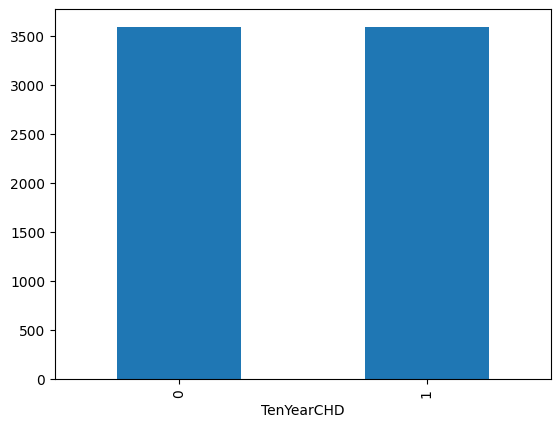

In [18]:
df_balanced['TenYearCHD'].value_counts().plot(kind='bar')

## Model train

In [19]:
X=df.drop(df[['TenYearCHD']],axis=1)
y=df[['TenYearCHD']]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1427,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.09,90.0,95.0
3257,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.06,55.0,73.0
3822,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.15,85.0,83.0
1263,0,49,0,0.0,0.0,0,0,0,270.0,126.5,67.5,26.56,70.0,77.0
3575,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0


In [22]:
y_train.head()

,TenYearCHD
1427,0
3257,0
3822,0
1263,0
3575,0


## Scaling data to avoid basied

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.fit_transform(X_test)


In [24]:
X_train_scaled

array([[-0.86045318,  0.39974402,  0.98769364, ..., -0.41854316,
         1.16336162,  0.59074045],
       [-0.86045318,  1.68620673,  0.98769364, ..., -1.39653754,
        -1.76502213, -0.36911792],
       [-0.86045318, -1.35452332, -1.01245969, ..., -0.88933946,
         0.74502108,  0.06718134],
       ...,
       [-0.86045318,  1.21840211, -1.01245969, ..., -0.17586465,
         0.57768487, -0.02007851],
       [ 1.16217828, -1.23757217,  0.98769364, ..., -0.31904497,
        -0.67733674, -0.8490471 ],
       [-0.86045318, -1.70537679, -1.01245969, ..., -1.255784  ,
         1.16336162, -0.06370844]])

## Model train on RandomForestclassifier algrothim

In [50]:
from sklearn.ensemble import RandomForestClassifier
rs=RandomForestClassifier(random_state=42)
rs.fit(X_train_scaled,y_train)
rs_predict=rs.predict(X_test_scaled)

C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## checking accuracy of mdoel

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f'Model Accuracy score: {accuracy_score(y_test,rs_predict)}')
print(f'Model Confusion mertix: {confusion_matrix(y_test,rs_predict)}')
print(f'Model classification_report: {classification_report(y_test,rs_predict)}')



Model Accuracy score: 0.8502358490566038
Model Confusion mertix: [[715  10]
 [117   6]]
Model classification_report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.38      0.05      0.09       123

    accuracy                           0.85       848
   macro avg       0.62      0.52      0.50       848
weighted avg       0.79      0.85      0.80       848



In [43]:
from sklearn.svm import SVC
ada=SVC()
ada_model=rs.fit(X_train_scaled,y_train)
ada_predict=rs_model.predict(X_test_scaled)

print(f'Model Accuracy score: {accuracy_score(y_test,ada_predict)}')
print(f'Model Confusion mertix: {confusion_matrix(y_test,ada_predict)}')
print(f'Model classification_report: {classification_report(y_test,ada_predict)}')



C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy score: 0.8502358490566038
Model Confusion mertix: [[715  10]
 [117   6]]
Model classification_report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.38      0.05      0.09       123

    accuracy                           0.85       848
   macro avg       0.62      0.52      0.50       848
weighted avg       0.79      0.85      0.80       848



In [53]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(
    estimators=[
        ("Randomforestclassifeir",rs),
        ("SVC",ada)
    ],voting="hard"
)

voting.fit(X_train_scaled,y_train)
voting_predict=voting.predict(X_test_scaled)

C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [54]:
print(f'Model Accuracy score: {accuracy_score(y_test,voting_predict)}')
print(f'Model Confusion mertix: {confusion_matrix(y_test,voting_predict)}')
print(f'Model classification_report: {classification_report(y_test,voting_predict)}')


Model Accuracy score: 0.8537735849056604
Model Confusion mertix: [[724   1]
 [123   0]]
Model classification_report:               precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



In [55]:
def prediction(male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    # Prepare input data
    data = {
        'male': [male],
        'age': [age],
        'currentSmoker': [currentSmoker],
        'cigsPerDay': [cigsPerDay],
        'BPMeds': [BPMeds],
        'prevalentStroke': [prevalentStroke],
        'prevalentHyp': [prevalentHyp],
        'diabetes': [diabetes],
        'totChol': [totChol],
        'sysBP': [sysBP],
        'diaBP': [diaBP],
        'BMI': [BMI],
        'heartRate': [heartRate],
        'glucose': [glucose]
    }

    # Create DataFrame
    df = pd.DataFrame(data)

    # Scale numeric features
    

    # Predict
    result = voting.predict(df).reshape(1, -1)
    return result[0]


In [61]:
re=prediction(0,63,0,0.0,0.0,0,1,0,210.0,148,85.5,24.01,76,88)
#         		0.0	0	1	0	210.0	148.0	85.5	24.01	76.0	88.0	

C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [62]:
if re==0:
    print("No")
else:
    print("yes")

No


In [63]:
import pickle
pickle.dump(voting, open("Model/Heart disease detection model.pkl", "wb"))